In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv')

In [3]:
df.columns = df.columns.str.strip()

In [5]:
print(df.head())

  Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms  carbon dioxide   
1         111CA                                      Farms         methane   
2         111CA                                      Farms   nitrous oxide   
3         111CA                                      Farms      other GHGs   
4         113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0  Supply Chain Emission Factors without Margins   
1                                          0.023   
2                                          0.002   
3                                          0.004   
4                             

In [7]:
df['Supply Chain Emission Factors without Margins'] = df.apply(
    lambda row: row['Supply Chain Emission Factors with Margins'] - row['Margins of Supply Chain Emission Factors']
    if row['Supply Chain Emission Factors without Margins'] == 'Supply Chain Emission Factors without Margins'
    else row['Supply Chain Emission Factors without Margins'],
    axis=1
)

In [8]:
df['Supply Chain Emission Factors without Margins'] = pd.to_numeric(
    df['Supply Chain Emission Factors without Margins'], errors='coerce'
)

In [10]:
print(df.head())
print(df['Supply Chain Emission Factors without Margins'].dtype)

  Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms  carbon dioxide   
1         111CA                                      Farms         methane   
2         111CA                                      Farms   nitrous oxide   
3         111CA                                      Farms      other GHGs   
4         113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.424   
1                                          0.023   
2                                          0.002   
3                                          0.004   
4                             

In [11]:
print(df['Supply Chain Emission Factors without Margins'].isnull().sum())

0


In [12]:
print(df[['Industry Name', 'Substance', 'Supply Chain Emission Factors without Margins', 
          'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins']].head())

                               Industry Name       Substance  \
0                                      Farms  carbon dioxide   
1                                      Farms         methane   
2                                      Farms   nitrous oxide   
3                                      Farms      other GHGs   
4  Forestry, fishing, and related activities  carbon dioxide   

   Supply Chain Emission Factors without Margins  \
0                                          0.424   
1                                          0.023   
2                                          0.002   
3                                          0.004   
4                                          0.184   

   Margins of Supply Chain Emission Factors  \
0                                     0.041   
1                                     0.000   
2                                     0.000   
3                                     0.000   
4                                     0.017   

   Supply Chain Emi

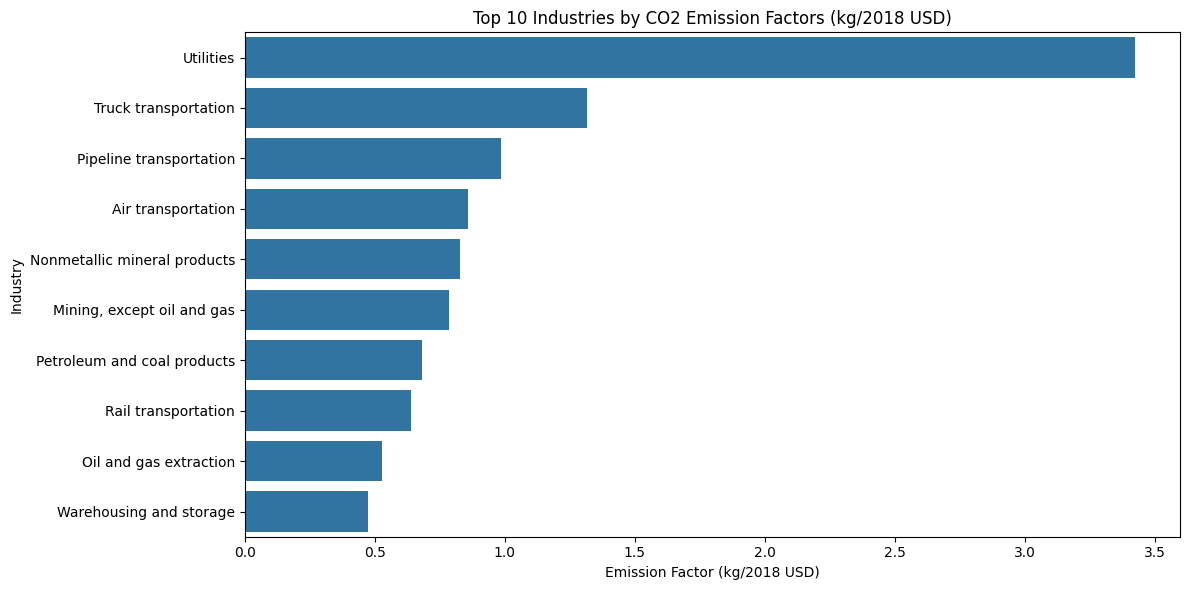

In [16]:
co2_df = df[df['Substance'] == 'carbon dioxide']
top_10_co2 = co2_df.nlargest(10, 'Supply Chain Emission Factors with Margins')

plt.figure(figsize=(12, 6))
sns.barplot(x='Supply Chain Emission Factors with Margins', y='Industry Name', data=top_10_co2)
plt.title('Top 10 Industries by CO2 Emission Factors (kg/2018 USD)')
plt.xlabel('Emission Factor (kg/2018 USD)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

C:\Users\omjid\AppData\Local\Temp\ipykernel_4660\2873688462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Substance', y='Supply Chain Emission Factors with Margins', data=df, palette='pastel', showfliers=False)


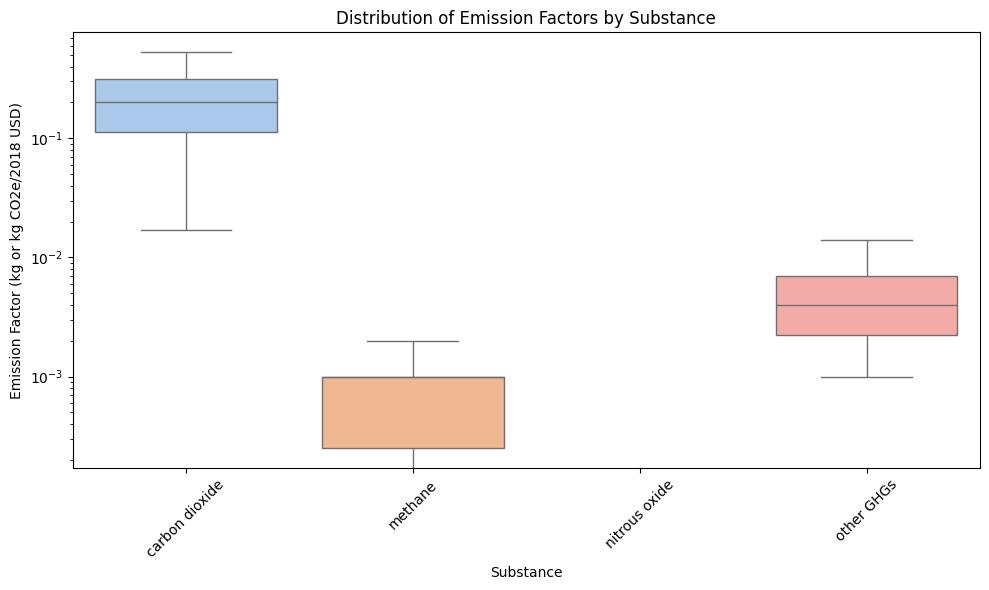

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Substance', y='Supply Chain Emission Factors with Margins', data=df, palette='pastel', showfliers=False)
plt.title('Distribution of Emission Factors by Substance')
plt.xlabel('Substance')
plt.ylabel('Emission Factor (kg or kg CO2e/2018 USD)')
plt.xticks(rotation=45)
plt.yscale('log')  
plt.tight_layout()
plt.show()

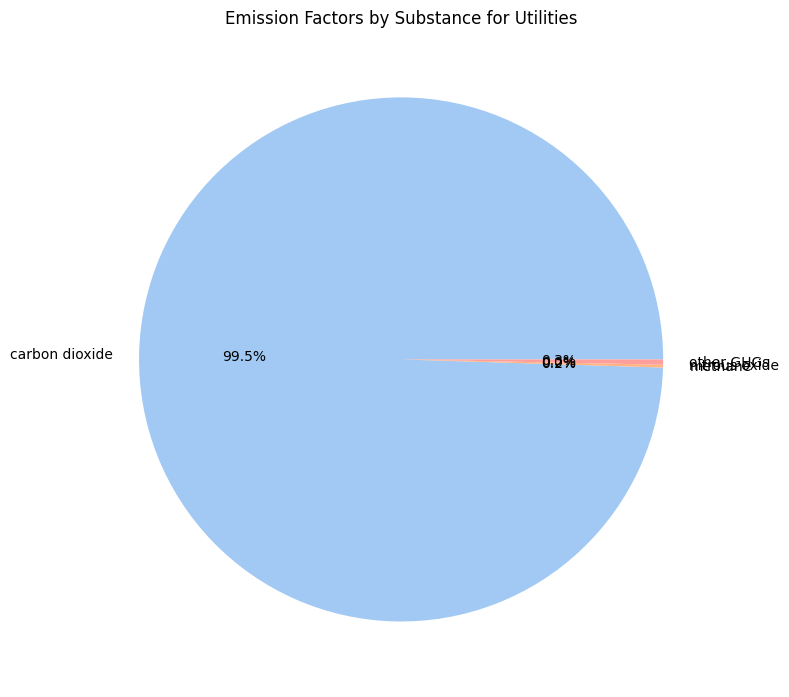

In [32]:
utilities_df = df[df['Industry Code'] == '22']

plt.figure(figsize=(8 ,8))
plt.pie(utilities_df['Supply Chain Emission Factors with Margins'], 
        labels=utilities_df['Substance'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'))
plt.title('Emission Factors by Substance for Utilities')
plt.tight_layout()
plt.show()

In [25]:
df.to_csv('cleaned_emission_factors.csv', index=False)

In [27]:
saved_df = pd.read_csv('cleaned_emission_factors.csv')
print("First few rows of saved data:")
print(saved_df.head())

First few rows of saved data:
  Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms  carbon dioxide   
1         111CA                                      Farms         methane   
2         111CA                                      Farms   nitrous oxide   
3         111CA                                      Farms      other GHGs   
4         113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.424   
1                                          0.023   
2                                          0.002   
3                                          0.004   


In [28]:
saved_df = saved_df.drop(columns=[col for col in saved_df.columns if 'Unnamed' in col])

In [29]:
print("Columns after dropping Unnamed:", saved_df.columns.tolist())

Columns after dropping Unnamed: ['Industry Code', 'Industry Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [30]:
saved_df.to_csv('cleaned_emission_factors.csv', index=False)